# Testing Awal

## Input image Botol AVENT

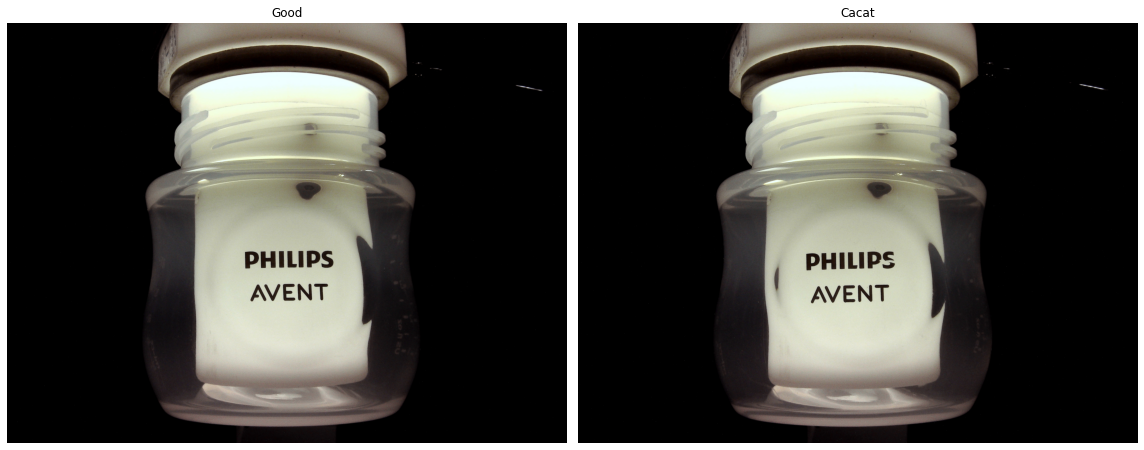

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

image1 = Image.open(r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\good\GOOD_AVENT20230728112550235490.jpg")
image2 = Image.open(r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\reject\REJECT_AVENT20230728124204680623.jpg")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title("Good")

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title("Cacat")

plt.tight_layout()
plt.show()

## Cropping Logo

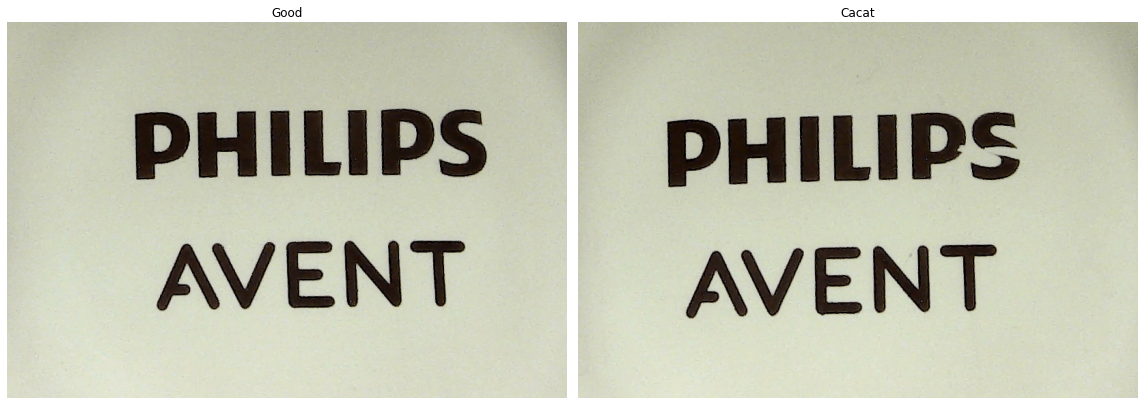

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

left1, upper1, right1, lower1 = 1200, 1200, 2020, 1750
cropped_image1 = image1.crop((left1, upper1, right1, lower1))

left2, upper2, right2, lower2 = 1200, 1200, 2020, 1750
cropped_image2 = image2.crop((left2, upper2, right2, lower2))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(cropped_image1)
axes[0].axis('off')
axes[0].set_title("Good")

axes[1].imshow(cropped_image2)
axes[1].axis('off')
axes[1].set_title("Cacat")

plt.tight_layout()
plt.show()

## Threshold Biner (0 dan 255)


### Brightness & Threshold (Filter >120)

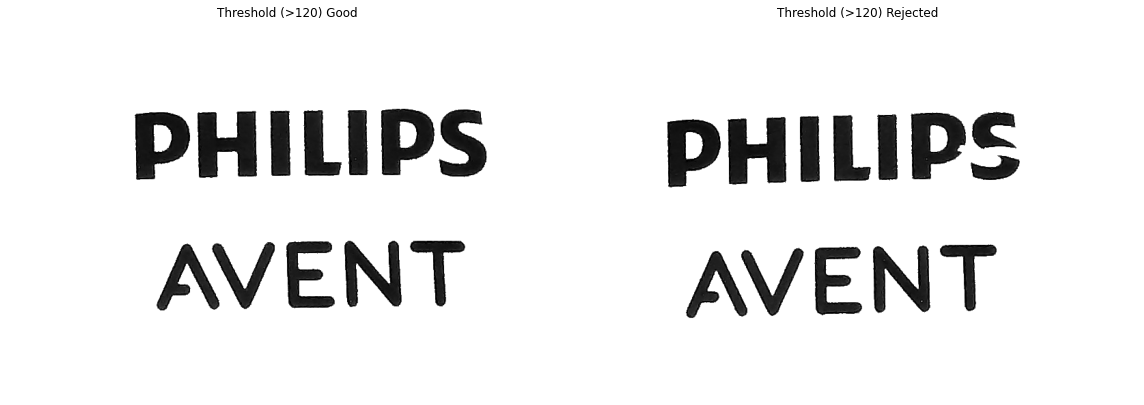

In [14]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Convert PIL Image to NumPy array
image1_th1 = cv2.cvtColor(np.array(cropped_image1), cv2.COLOR_RGB2GRAY)
image2_th2 = cv2.cvtColor(np.array(cropped_image2), cv2.COLOR_RGB2GRAY)

# Set pixel values above 200 to 0, while leaving values between 0 and 200 unchanged
threshold_value = 120
image1_th1[image1_th1 > threshold_value] = 255
image2_th2[image2_th2 > threshold_value] = 255

# Plot the modified images side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Modified image 1
axes[0].imshow(image1_th1, cmap='gray')  # Display in grayscale
axes[0].axis('off')
axes[0].set_title("Threshold (>120) Good")

# Modified image 2
axes[1].imshow(image2_th2, cmap='gray')  # Display in grayscale
axes[1].axis('off')
axes[1].set_title("Threshold (>120) Rejected")

plt.tight_layout()
plt.show()

## Hough Transform

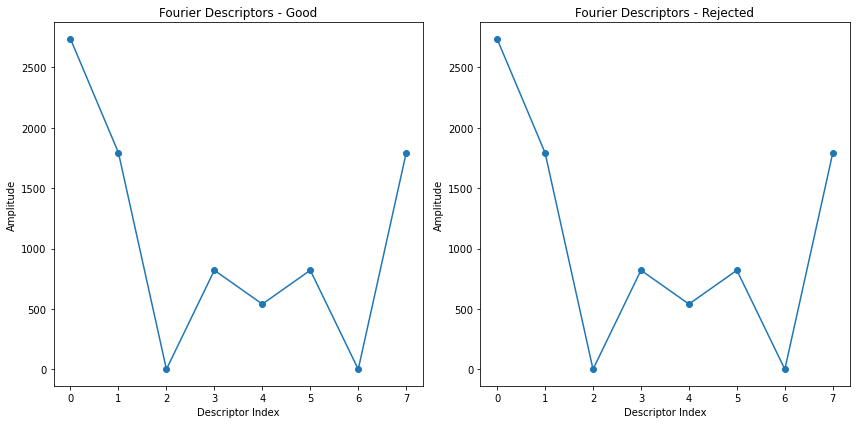

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

contours1, _ = cv2.findContours(image1_th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(image2_th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the largest contour (assuming it represents the object)
contour1 = max(contours1, key=cv2.contourArea)
contour2 = max(contours2, key=cv2.contourArea)

# Compute the complex Fourier coefficients of the contours
fourier_coeffs1 = np.fft.fft(contour1.reshape(-1))
fourier_coeffs2 = np.fft.fft(contour2.reshape(-1))

# Keep a subset of the Fourier coefficients (e.g., the first 10)
num_coeffs_to_keep = 100
fourier_coeffs1 = fourier_coeffs1[:num_coeffs_to_keep]
fourier_coeffs2 = fourier_coeffs2[:num_coeffs_to_keep]

# Calculate the Fourier descriptors
descriptors1 = np.abs(fourier_coeffs1)
descriptors2 = np.abs(fourier_coeffs2)

# Display the Fourier descriptors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(descriptors1, marker='o')
plt.title("Fourier Descriptors - Good")
plt.xlabel("Descriptor Index")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.plot(descriptors2, marker='o')
plt.title("Fourier Descriptors - Rejected")
plt.xlabel("Descriptor Index")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


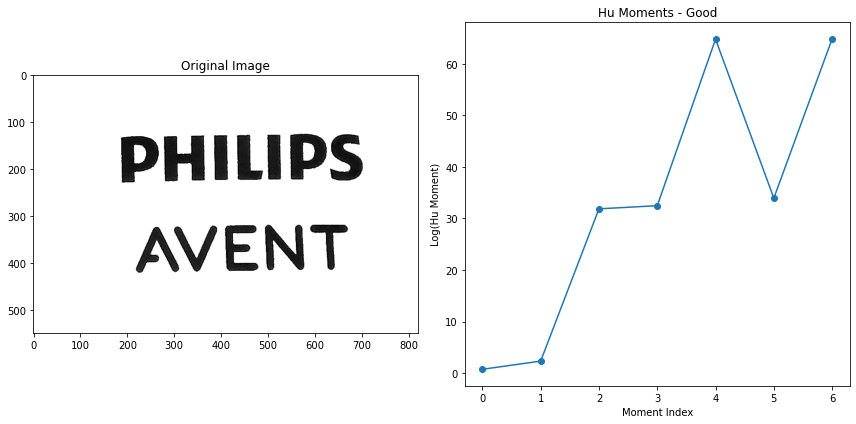

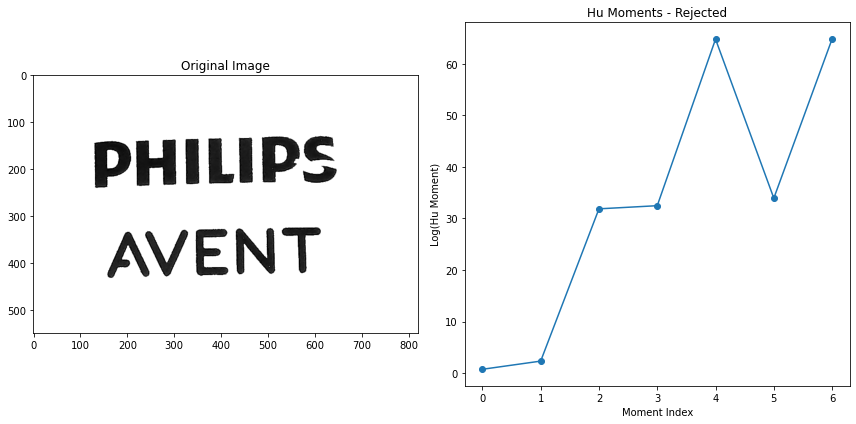

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_hu_moments_and_plot(image, title):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments)
    
    log_hu_moments = -1 * np.sign(hu_moments) * np.log10(np.abs(hu_moments))
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.plot(log_hu_moments, marker='o')
    plt.title(f"Hu Moments - {title}")
    plt.xlabel("Moment Index")
    plt.ylabel("Log(Hu Moment)")

    plt.tight_layout()
    plt.show()

calculate_hu_moments_and_plot(image1_th1, "Good")
calculate_hu_moments_and_plot(image2_th2, "Rejected")

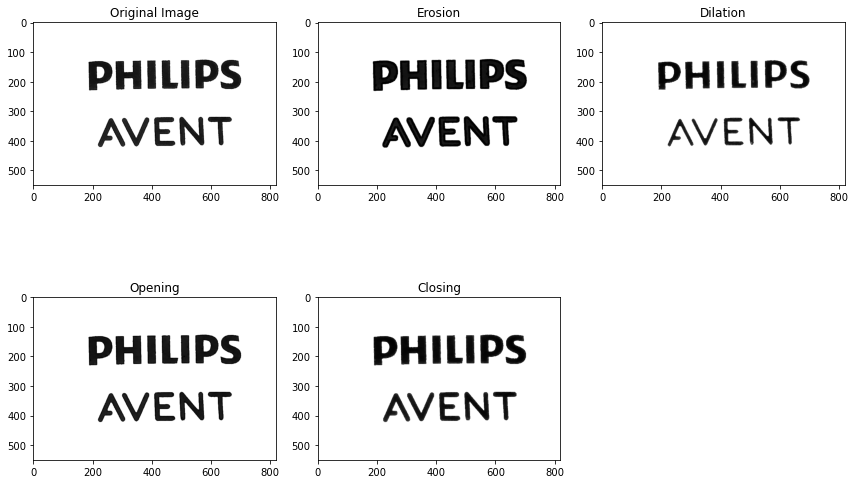

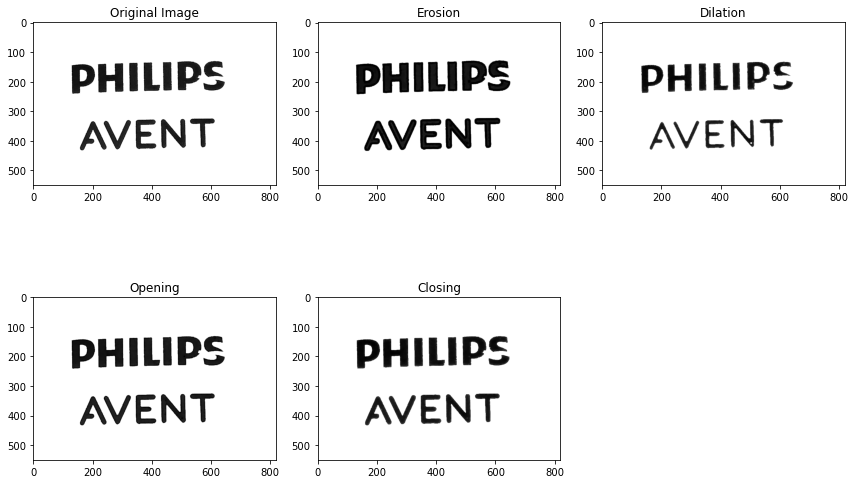

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a function to perform morphology analysis and plot the result
def morphology_analysis_and_plot(image, title):
    # Define a kernel (structuring element) for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Erosion - Removes small white noises from the image
    erosion = cv2.erode(image, kernel, iterations=1)

    # Dilation - Increases the white region in the image
    dilation = cv2.dilate(image, kernel, iterations=1)

    # Opening - Erosion followed by dilation
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    # Closing - Dilation followed by erosion
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # Display the results
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(2, 3, 2)
    plt.imshow(erosion, cmap='gray')
    plt.title("Erosion")

    plt.subplot(2, 3, 3)
    plt.imshow(dilation, cmap='gray')
    plt.title("Dilation")

    plt.subplot(2, 3, 4)
    plt.imshow(opening, cmap='gray')
    plt.title("Opening")

    plt.subplot(2, 3, 5)
    plt.imshow(closing, cmap='gray')
    plt.title("Closing")

    plt.tight_layout()
    plt.show()

# Perform morphology analysis on image1_th1
morphology_analysis_and_plot(image1_th1, "Good")

# Perform morphology analysis on image2_th2
morphology_analysis_and_plot(image2_th2, "Rejected")


## Fourier Descriptor

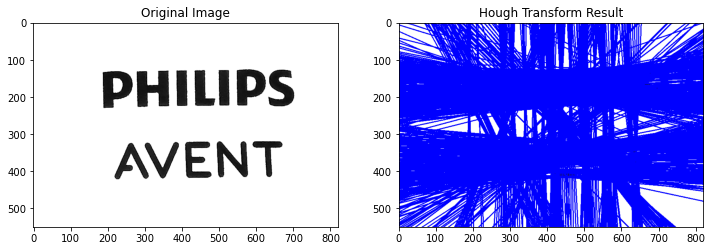

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Apply edge detection (e.g., Canny) to find edges in the image
edges = cv2.Canny(image1_th1, threshold1=50, threshold2=150, apertureSize=3)

# Apply the Hough Transform to detect lines
lines = cv2.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=40)

# Plot the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_th1, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Plot the Hough Transform result
plt.subplot(1, 2, 2)
result_image = cv2.cvtColor(image1_th1.copy(), cv2.COLOR_BGR2RGB)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(result_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(result_image)
plt.title("Hough Transform Result")
plt.show()


## Uji Parameter Evaluasi

In [21]:
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as compare_ssim


cropped_image1_gray = np.array(image1_th1)
cropped_image2_gray = np.array(image2_th2)

def normalized_cross_correlation(image, template):
    mean_template = np.mean(template)
    mean_image = np.mean(image)

    image_minus_mean = image - mean_image
    template_minus_mean = template - mean_template
    
    numerator = np.sum(image_minus_mean * template_minus_mean)
    
    denom_image = np.sqrt(np.sum(image_minus_mean**2))
    denom_template = np.sqrt(np.sum(template_minus_mean**2))
    
    similarity_score = numerator / (denom_image * denom_template)

    return similarity_score

def dice_coefficient(image1, image2):
    intersection = np.sum(image1 & image2)
    dice = (2.0 * intersection) / (np.sum(image1) + np.sum(image2))
    return dice

def intersection_over_union(image1, image2):
    intersection = np.sum(image1 & image2)
    union = np.sum(image1 | image2)
    iou = float(intersection) / union
    return iou


ssim_score = compare_ssim(cropped_image1_gray, cropped_image2_gray)
similarity_score = normalized_cross_correlation(image1_th1, image2_th2)
dc_score = dice_coefficient(image1_th1, image2_th2)
iou_score = intersection_over_union(image1_th1, image2_th2)

print(f"SSIM Score: {ssim_score}")
print("Normalized Cross-Correlation Similarity Score:", similarity_score)
print("dc_score :", dc_score)
print("iou_score :", iou_score)

SSIM Score: 0.8134877871546496
Normalized Cross-Correlation Similarity Score: 0.3735114084261685
dc_score : 0.9416989646998334
iou_score : 0.8898214527709867


## Pixel Sum

In [22]:
import numpy as np

# Convert PIL Images to NumPy arrays
image1_array = np.array(image1_th1)
image2_array = np.array(image2_th2)

# Calculate the sum of pixel values for each image
sum_of_pixels_image1 = np.sum(image1_array)
sum_of_pixels_image2 = np.sum(image2_array)

perbedaan_pixel = np.abs(sum_of_pixels_image2 - sum_of_pixels_image1)

# Print the sum of pixel values for each image
print(f"Sum of pixel values for Image Good     : {sum_of_pixels_image1}")
print(f"Sum of pixel values for Image Reject   : {sum_of_pixels_image2}")
print(f"Perbedaan pixel value                  : {perbedaan_pixel}")

Sum of pixel values for Image Good     : 104567934
Sum of pixel values for Image Reject   : 104721900
Perbedaan pixel value                  : 153966


## Matrix GLCM

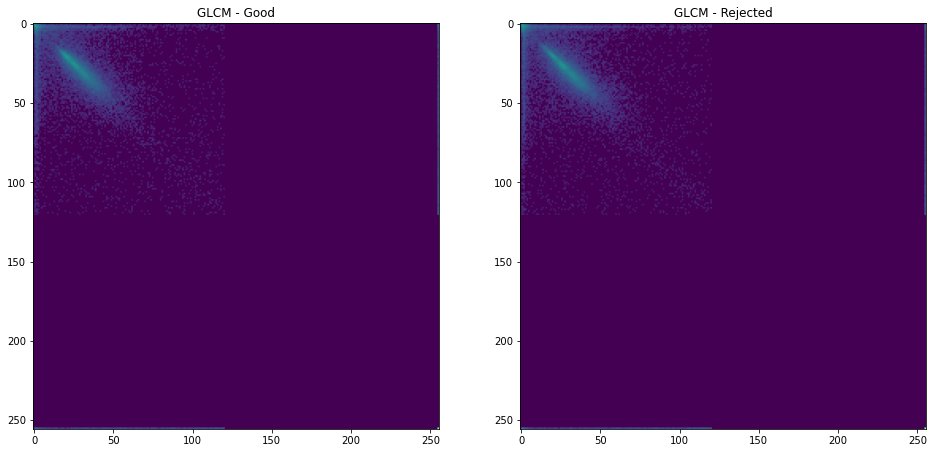

In [22]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

image1 = Image.open(r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\Data Pilihan\GLCM_good\GOOD_AVENT20230728112550235490.jpg")
image2 = Image.open(r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\Data Pilihan\GLCM_printkurang\REJECT_AVENT20230728114144760712.jpg")

img1_gray = np.average(image1, axis=2).astype(np.uint8)
img2_gray = np.average(cropped_image2, axis=2).astype(np.uint8)

img1_gray = np.array(image1_th1)
img2_gray = np.array(image2_th2)

pos_op = [1, 0]

glcm1 = np.zeros([256, 256])
glcm2 = np.zeros([256, 256])

for i in range(img1_gray.shape[0]):
    for j in range(img1_gray.shape[1]):
        init_val = img1_gray[i, j]
        try:
            target = img1_gray[i + pos_op[0], j + pos_op[1]]
        except IndexError:
            continue  # Out of image bounds
        glcm1[init_val, target] += 1

# Normalize GLCM for the first image
glcm1_matrix = glcm1 / np.sum(glcm1)

# Iterate over the second image and compute GLCM
for i in range(img2_gray.shape[0]):
    for j in range(img2_gray.shape[1]):
        init_val = img2_gray[i, j]
        try:
            target = img2_gray[i + pos_op[0], j + pos_op[1]]
        except IndexError:
            continue  # Out of image bounds
        glcm2[init_val, target] += 1

# Normalize GLCM for the second image
glcm2_matrix = glcm2 / np.sum(glcm2)

# Create a side-by-side plot of the two GLCMs
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(np.log(glcm1_matrix + 1e-6))
plt.title("GLCM - Good")

plt.subplot(1, 2, 2)
plt.imshow(np.log(glcm2_matrix + 1e-6))
plt.title("GLCM - Rejected")

plt.show()

In [2]:
# Proses semua citra dalam folder

import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Fungsi untuk menghitung dan menyimpan GLCM dari suatu gambar
def compute_and_save_glcm(image_path, output_folder):
    # Baca gambar menggunakan OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Ubah ke citra grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Definisikan posisi operasi
    pos_op = [1, 0]

    # Hitung GLCM
    glcm = np.zeros([256, 256])

    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            init_val = img_gray[i, j]
            try:
                target = img_gray[i + pos_op[0], j + pos_op[1]]
            except IndexError:
                continue  # Out of image bounds
            glcm[init_val, target] += 1

    # Normalize GLCM
    glcm1_matrix = glcm / np.sum(glcm)

    x_start = 0  # Starting x-coordinate of the crop
    y_start = 0  # Starting y-coordinate of the crop
    crop_width = 110  # Width of the crop
    crop_height = 110  # Height of the crop

    # Crop the region from the image matrix
    matrix1 = np.log(glcm1_matrix + 1e-6)

    cropped_image1 = matrix1[y_start:y_start + crop_height, x_start:x_start + crop_width]

    # Buat plot GLCM
    plt.figure()
    plt.imshow(cropped_image1)
    plt.title("GLCM")

    # Simpan plot ke folder output
    output_filename = os.path.join(output_folder, os.path.basename(image_path))
    plt.savefig(output_filename)
    plt.close()

# Folder input yang berisi gambar-gambar dari folder pertama
folder1 = r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\good_cropping'

# Folder output untuk menyimpan plot GLCM
output_folder1 = r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\Data Pilihan\GLCM_good'

# Pastikan folder output ada atau buat jika belum ada
os.makedirs(output_folder1, exist_ok=True)

# Loop melalui gambar-gambar di folder pertama
for filename1 in os.listdir(folder1):
    if filename1.endswith(".jpg"):
        image_path1 = os.path.join(folder1, filename1)
        compute_and_save_glcm(image_path1, output_folder1)

## Hitung Feature GLCM

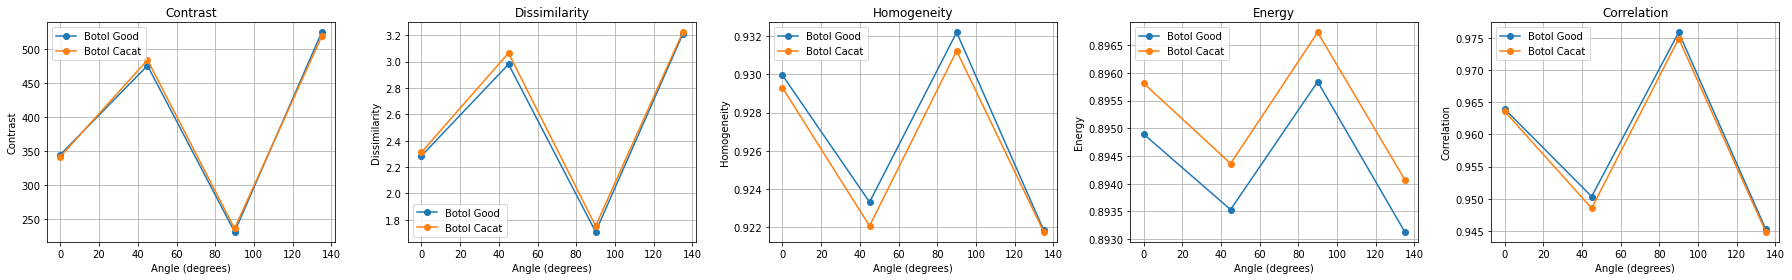

In [23]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

glcm1 = greycomatrix(image1_th1, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
glcm2 = greycomatrix(image2_th2, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

# Compute the GLCM properties for image1
contrast1 = greycoprops(glcm1, 'contrast')
dissimilarity1 = greycoprops(glcm1, 'dissimilarity')
homogeneity1 = greycoprops(glcm1, 'homogeneity')
energy1 = greycoprops(glcm1, 'energy')
correlation1 = greycoprops(glcm1, 'correlation')

# Compute the GLCM properties for image2
contrast2 = greycoprops(glcm2, 'contrast')
dissimilarity2 = greycoprops(glcm2, 'dissimilarity')
homogeneity2 = greycoprops(glcm2, 'homogeneity')
energy2 = greycoprops(glcm2, 'energy')
correlation2 = greycoprops(glcm2, 'correlation')

# Create lists for property names and values
properties = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']
values_image1 = [contrast1, dissimilarity1, homogeneity1, energy1, correlation1]
values_image2 = [contrast2, dissimilarity2, homogeneity2, energy2, correlation2]

angles_degrees = [0, 45, 90, 135]

fig, axs = plt.subplots(1, 5, figsize=(25, 4))

for i, property_name in enumerate(properties):
    property_values1 = values_image1[i].flatten()  # Flatten the array
    property_values2 = values_image2[i].flatten()  # Flatten the array
    
    axs[i].plot(angles_degrees, property_values1, marker='o', linestyle='-', label='Botol Good')
    axs[i].plot(angles_degrees, property_values2, marker='o', linestyle='-', label='Botol Cacat')
    axs[i].set_title(property_name)
    axs[i].set_xlabel('Angle (degrees)')
    axs[i].set_ylabel(property_name)
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

## Crop GLCM

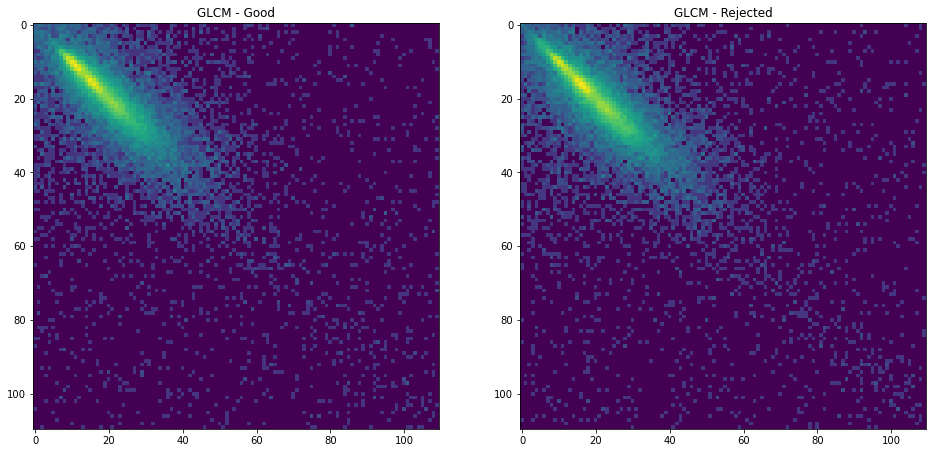

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x_start = 10  # Starting x-coordinate of the crop
y_start = 10  # Starting y-coordinate of the crop
crop_width = 110  # Width of the crop
crop_height = 110  # Height of the crop

# Crop the region from the image matrix
matrix1 = np.log(glcm1_matrix + 1e-6)
matrix2 = np.log(glcm2_matrix + 1e-6)


cropped_image1 = matrix1[y_start:y_start + crop_height, x_start:x_start + crop_width]
cropped_image2 = matrix2[y_start:y_start + crop_height, x_start:x_start + crop_width]

# Create a side-by-side plot of the two GLCMs
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(cropped_image1)
plt.title("GLCM - Good")

plt.subplot(1, 2, 2)
plt.imshow(cropped_image2)
plt.title("GLCM - Rejected")

plt.show()

## Hitung GLCM 2

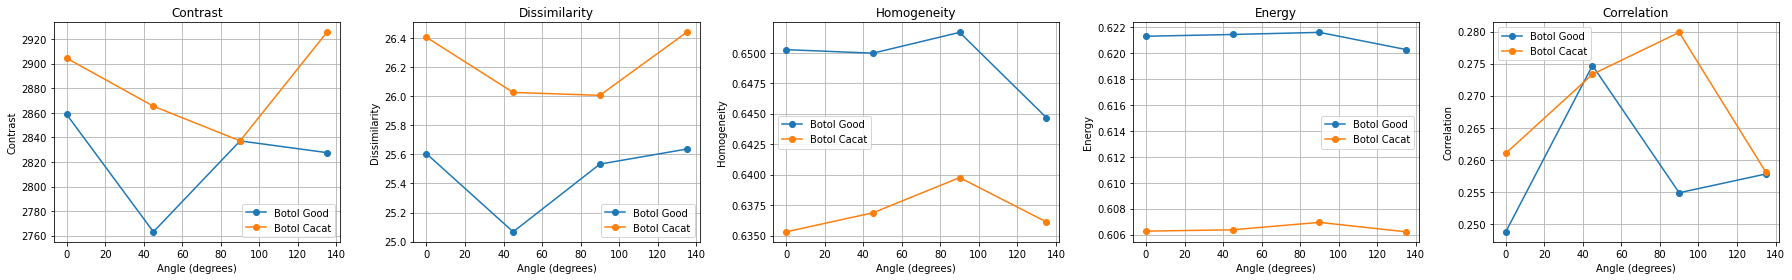

In [25]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

cropped_image1 = (cropped_image1 * 255).astype(np.uint8)
cropped_image2 = (cropped_image2 * 255).astype(np.uint8)


glcm1 = greycomatrix(cropped_image1, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
glcm2 = greycomatrix(cropped_image2, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

# Compute the GLCM properties for image1
contrast1 = greycoprops(glcm1, 'contrast')
dissimilarity1 = greycoprops(glcm1, 'dissimilarity')
homogeneity1 = greycoprops(glcm1, 'homogeneity')
energy1 = greycoprops(glcm1, 'energy')
correlation1 = greycoprops(glcm1, 'correlation')

# Compute the GLCM properties for image2
contrast2 = greycoprops(glcm2, 'contrast')
dissimilarity2 = greycoprops(glcm2, 'dissimilarity')
homogeneity2 = greycoprops(glcm2, 'homogeneity')
energy2 = greycoprops(glcm2, 'energy')
correlation2 = greycoprops(glcm2, 'correlation')

# Create lists for property names and values
properties = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']
values_image1 = [contrast1, dissimilarity1, homogeneity1, energy1, correlation1]
values_image2 = [contrast2, dissimilarity2, homogeneity2, energy2, correlation2]

angles_degrees = [0, 45, 90, 135]

fig, axs = plt.subplots(1, 5, figsize=(25, 4))

for i, property_name in enumerate(properties):
    property_values1 = values_image1[i].flatten()  # Flatten the array
    property_values2 = values_image2[i].flatten()  # Flatten the array
    
    axs[i].plot(angles_degrees, property_values1, marker='o', linestyle='-', label='Botol Good')
    axs[i].plot(angles_degrees, property_values2, marker='o', linestyle='-', label='Botol Cacat')
    axs[i].set_title(property_name)
    axs[i].set_xlabel('Angle (degrees)')
    axs[i].set_ylabel(property_name)
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

# Process Semua File dalam Folder

### Crop and Threshold

In [ ]:
import os
import cv2
from PIL import Image


# Folder input dan output
input_folder = r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\reject'
output_folder = r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\reject_cropping'

# Koordinat cropping
left2, upper2, right2, lower2 = 1200, 1200, 2020, 1750

# Ambil daftar nama file di folder input
file_names = os.listdir(input_folder)

# Loop melalui setiap file di folder input
for file_name in file_names:
    # Pastikan file adalah file gambar JPG
    if file_name.endswith(".jpg"):
        # Baca gambar
        image_path = os.path.join(input_folder, file_name)
        image = Image.open(image_path)

        # Crop gambar
        cropped_image = image.crop((left2, upper2, right2, lower2))

        # Terapkan thresholding
        image_gray = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2GRAY)
        threshold_value = 120
        image_gray[image_gray > threshold_value] = 255

        # Simpan gambar hasil pengolahan
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, image_gray)

print("Proses selesai.")

Proses selesai.


## GLCM and Histogram Analysis Semua File

In [172]:
import os
import numpy as np
import pandas as pd
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color


# Fungsi untuk menghitung GLCM
def calculate_glcm(image):
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm_features = []

    image = color.rgb2gray(image)  # Konversi citra ke grayscale

    for angle in angles:
        glcm = greycomatrix(image, [5], [angle], symmetric=True, normed=True)
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        glcm_features.extend([homogeneity, energy])

    return glcm_features

# Fungsi untuk melakukan analisis histogram
def analyze_histogram(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    hist = hist[0:50]  # Ambil rentang histogram 50-100
    return hist

# Daftar folder dengan citra
input_folders = [
    r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\good_cropping',
    r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\Data Pilihan\print kurang',
]

# Inisialisasi list untuk menyimpan data
data = []
folder_to_target = {}  # Kamus untuk memetakan nama folder ke target (angka)

# Loop melalui citra di folder
for idx, input_folder in enumerate(input_folders):
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            filepath = os.path.join(input_folder, filename)
            image = io.imread(filepath)

            if image is not None:
                # Hitung GLCM
                glcm_features = calculate_glcm(image)

                # Analisis histogram
                gray_image = color.rgb2gray(image)
                histogram = analyze_histogram(gray_image)

                # Tentukan target berdasarkan indeks folder
                folder_name = os.path.basename(input_folder)
                target = idx  # Menggunakan indeks folder sebagai target

                # Tambahkan data ke dalam list
                data.append([filename, *glcm_features, *histogram, target, folder_name])

# Simpan data ke dalam DataFrame Pandas
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
column_names = ['Nama File Citra'] + [f'GLCM Homogeneity {angle}' for angle in angles] + [f'GLCM Energy {angle}' for angle in angles] + [f'Histogram {i}' for i in range(0, 50)] + ['Target', 'Kategori']
df = pd.DataFrame(data, columns=column_names)

# Simpan DataFrame ke dalam file CSV
output_csv = r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv'
df.to_csv(output_csv, index=False)

print(f'Data telah disimpan dalam {output_csv}')


C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: FutureWarning:

The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:51: FutureWarning:

The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.



Data telah disimpan dalam E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv


In [52]:
import os
import numpy as np
import pandas as pd
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte

def calculate_glcm_features(image):
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm_energies = []
    glcm_homogeneities = []

    image = color.rgb2gray(image)
    
    image = img_as_ubyte(image)

    for angle in angles:
        glcm = greycomatrix(image, [5], [angle], symmetric=True, normed=True)
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        glcm_energies.append(energy)
        glcm_homogeneities.append(homogeneity)

    return glcm_energies, glcm_homogeneities

input_folders = [
    r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\Data Pilihan\GLCM_good',
    r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\Data Pilihan\GLCM_printkurang',
]

data = []
folder_to_target = {}

for idx, input_folder in enumerate(input_folders):
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            filepath = os.path.join(input_folder, filename)
            image = io.imread(filepath)

            if image is not None:
                glcm_energies, glcm_homogeneities = calculate_glcm_features(image)
                
                folder_name = os.path.basename(input_folder)
                target = idx 
                
                data.append([filename, *glcm_energies, *glcm_homogeneities, target, folder_name])

# Simpan data ke dalam DataFrame Pandas
column_names = ['Nama File Citra'] + [f'GLCM Energy {angle}' for angle in angles] + [f'GLCM Homogeneity {angle}' for angle in angles] + ['Target', 'Kategori']
df = pd.DataFrame(data, columns=column_names)

# Simpan DataFrame ke dalam file CSV
output_csv = r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_GLCM2.csv'
df.to_csv(output_csv, index=False)

print(f'Data energi dan homogenitas GLCM telah disimpan dalam {output_csv}')


Data energi dan homogenitas GLCM telah disimpan dalam E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_GLCM2.csv


### Klasifikasi Jenis Cacat

Good = 0

Over Printing = 1

Print Kurang = 2

Warna Pudar = 3

## Plot PCA

In [173]:
import pandas as pd 

df_good = pd.read_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv')

df_good

,Nama File Citra,GLCM Homogeneity 0,GLCM Homogeneity 0.7853981633974483,GLCM Homogeneity 1.5707963267948966,GLCM Homogeneity 2.356194490192345,GLCM Energy 0,GLCM Energy 0.7853981633974483,GLCM Energy 1.5707963267948966,GLCM Energy 2.356194490192345,Histogram 0,...,Histogram 42,Histogram 43,Histogram 44,Histogram 45,Histogram 46,Histogram 47,Histogram 48,Histogram 49,Target,Kategori
0,GOOD_AVENT20230728112550235490.jpg,0.884175,0.861996,0.880803,0.859915,0.890854,0.865237,0.878839,0.859168,1576,...,383,323,265,234,214,240,195,143,0,good_cropping
1,GOOD_AVENT20230728112603438801.jpg,0.882390,0.859124,0.878495,0.857078,0.889527,0.862273,0.877282,0.856429,1524,...,310,236,206,199,205,180,165,115,0,good_cropping
2,GOOD_AVENT20230728112617171763.jpg,0.883151,0.860741,0.879519,0.858491,0.889754,0.863701,0.877484,0.857712,1500,...,325,311,259,255,213,198,201,168,0,good_cropping
3,GOOD_AVENT20230728112819960539.jpg,0.882352,0.859666,0.879070,0.857791,0.889961,0.863294,0.877542,0.857232,1556,...,409,347,321,315,263,242,209,174,0,good_cropping
4,GOOD_AVENT20230728112833471132.jpg,0.883655,0.861808,0.880053,0.859846,0.890735,0.865128,0.878790,0.859176,1481,...,399,312,279,257,235,241,179,174,0,good_cropping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,REJECT_AVENT20230728124426440413.jpg,0.896284,0.879184,0.894081,0.877416,0.902286,0.880749,0.891934,0.876274,1569,...,322,306,250,272,241,204,174,167,1,print kurang
288,REJECT_AVENT20230728124439157926.jpg,0.898212,0.881895,0.895986,0.880352,0.904309,0.884547,0.893755,0.879180,1539,...,311,242,262,221,221,214,192,183,1,print kurang
289,REJECT_AVENT20230728124451964105.jpg,0.896856,0.880022,0.894295,0.878252,0.902600,0.882186,0.892545,0.877048,1529,...,372,277,259,268,253,218,208,175,1,print kurang
290,REJECT_AVENT20230728124504848948.jpg,0.897050,0.880053,0.894854,0.878462,0.903324,0.882654,0.892709,0.877413,1473,...,348,280,279,254,229,230,185,179,1,print kurang


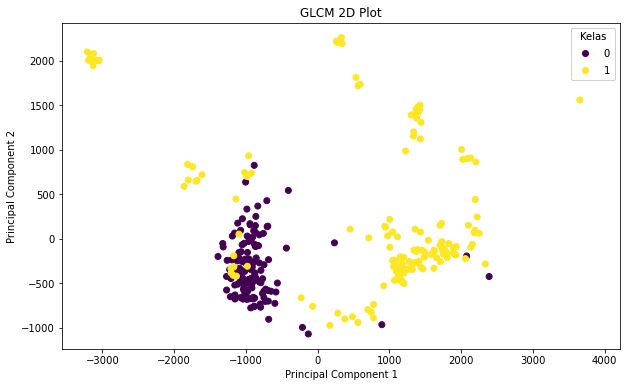

In [180]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the combined dataset from the CSV file
df_combined = pd.read_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv')

# Select columns containing GLCM and Histogram data as input features
X = df_combined.iloc[:, 1:-2].values  # Untuk Penentuan Print Kurang

# Select the "Target" column as the target class
y = df_combined['Target'].values

# Perform PCA with 5 principal components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Simpan model PCA ke dalam file menggunakan joblib
joblib.dump(pca, r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\hasil pengolahan\model\pca_model_2.pkl')

# Create a DataFrame to store PCA values, image names, and target values
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['Nama File Citra'] = df_combined['Nama File Citra'].reset_index(drop=True)
pca_df['Target'] = y  # Add the "Target" column to the DataFrame

# Plot the 2D PCA scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('GLCM 2D Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    title="Kelas", loc="upper right")
plt.gca().add_artist(legend1)

plt.show()

# Save PCA values, image names, and target values to a CSV file
pca_df.to_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\pca_values_print_kurang.csv', index=False)

In [175]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA


# Gabungkan data dari kedua kelas
df_combined = pd.read_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv')

# Pilih kolom GLCM dan Histogram sebagai input
X = df_combined.iloc[:, 1:-2].values  # Exclude Nama File, Target, dan Kategori

# Lakukan PCA
pca = PCA(n_components=3)  # Ubah menjadi 3 komponen utama
X_pca = pca.fit_transform(X)

# Tambahkan komponen PCA ke dataframe
df_combined['PCA1'] = X_pca[:, 0]
df_combined['PCA2'] = X_pca[:, 1]
df_combined['PCA3'] = X_pca[:, 2]

# Buat plot PCA 3D dengan Plotly
fig = px.scatter_3d(df_combined, x='PCA1', y='PCA2', z='PCA3', color='Target',
                     title='PCA 3D Plot', labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'PCA3': 'Principal Component 3'})


# Tampilkan plot
fig.show()

## Ujicoba Classifier

In [176]:
# Import necessary libraries
import pandas as pd

df_combined = pd.read_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\pca_values_print_kurang.csv')
X = df_combined.iloc[:, 1:-2].values  # Exclude Nama File, Target, dan Kategori
X = df_combined[['PC1', 'PC2', 'PC3', 'PC4']].values
y = df_combined['Target'].values

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import joblib

# Split the data into training and testing sets (assuming you have X_train, X_test, y_train, and y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a list of models
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SVM", SVC()),
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Multilayer Perceptron", MLPClassifier())
]

# Initialize variables to track the best model and accuracy
best_model = None
best_accuracy = 0.0

# Loop through the models and evaluate each one
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this model has the highest accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    classification_rep = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print()

# Print the best model and its accuracy
print(f"Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy}")

# Save the best model to a file
model_filename = r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\hasil pengolahan\model\model_2_RF.h5'
joblib.dump(best_model, model_filename)
print(f"Best Model saved to {model_filename}")

Model: Decision Tree
Accuracy: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.93      0.98      0.95        42

    accuracy                           0.95        88
   macro avg       0.95      0.96      0.95        88
weighted avg       0.96      0.95      0.95        88


Model: Random Forest
Accuracy: 0.9659090909090909
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.95      0.98      0.96        42

    accuracy                           0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88


Model: K-Nearest Neighbors
Accuracy: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
          